# Lecture 7: Transformers – GPT and BERT models

**Outline**

- [Building large-scale language models by leveraging unlabeled data](#Building-large-scale-language-models-by-leveraging-unlabeled-data)
  - [Pre-training and fine-tuning transformer models](#Pre-training-and-fine-tuning-transformer-models)
  - [Leveraging unlabeled data with GPT](#Leveraging-unlabeled-data-with-GPT)
  - [Using GPT-2 to generate new text](#Using-GPT-2-to-generate-new-text)
  - [Bidirectional pre-training with BERT](#Bidirectional-pre-training-with-BERT)
  - [The best of both worlds: BART](#The-best-of-both-worlds-BART)

In [2]:
from IPython.display import Image

## Building large-scale language models by leveraging unlabeled data

We discuss popular large-scale transformer models that emerged from the original transformer. One common theme among these transformers is that they are pre-trained on very large, unlabeled datasets and then fine-tuned for their respective target tasks.

Let us first look at the common training procedure of transformer-based models and explain how it is different from the original transformer.

Then, we focus on popular large-scale language models:
- **Generative Pre-trained Transformer (GPT)**
- **Bidirectional Encoder Representations from Transformers (BERT)**
- **Bidirectional and Auto-Regressive Transformers (BART)**

## Pre-training and fine-tuning transformer models

For example, language translation is a supervised task and requires a labeled dataset, which can be very expensive to obtain.

The lack of large, labeled datasets is a long-lasting problem in deep learning, especially for models
like the transformer, which are even more data hungry than other deep learning architectures. 

However, given that large amounts of text (books, websites, and social media posts) are generated every day, an interesting question is how we can use such unlabeled data for improving the model training.

The key idea here is a process called **self-supervised learning**.

We can generate “labels” from supervised learning from plain text itself. 

For example, given a large, unlabeled text corpus, we train the model to perform next-word prediction, which enables the model to learn the probability distribution of words and can form a strong basis for becoming a powerful language model.

Self-supervised learning is traditionally also referred to as **unsupervised pre-training** and is essential for the success of modern transformer-based models. 

The “unsupervised” in unsupervised pre-training supposedly refers to the fact that we use unlabeled data. However, since we use the structure of the data to generate labels (for example, the next-word prediction task mentioned previously), it is still a supervised learning process.

To elaborate a bit further on how unsupervised pre-training and next-word prediction works, if we
have a sentence containing n words, the pre-training procedure can be decomposed into the following
three steps:
1. At time step 1, feed in the ground-truth words $1, \ldots,i-1$.
2. Ask the model to predict the word at position $i$ and compare it with the ground-truth word $i$.
3. Update the model and time step, $i:= i+1$. Go back to step 1 and repeat until all words are processed.

Note that in the next iteration, we always feed the model the ground-truth (correct) words
instead of what the model has generated in the previous round.

The main idea of pre-training is to make use of plain text and then transfer and fine-tune the model
to perform some specific tasks for which a (smaller) labeled dataset is available. Now, there are many
different types of pre-training techniques. For example, the previously mentioned next-word prediction
task can be considered as a unidirectional pre-training approach. 

Later, we introduce additional pre-training techniques that are utilized in different language models to achieve various functionalities.

A complete training procedure of a transformer-based model consists of two parts: (1) pre-training
on a large, unlabeled dataset and (2) training (that is, fine-tuning) the model for specific downstream
tasks using a labeled dataset. In the first step, the pre-trained model is not designed for any specific
task but rather trained as a “general” language model. Afterward, via the second step, it can be generalized
to any customized task via regular supervised learning on a labeled dataset.

With the representations that can be obtained from the pre-trained model, there are mainly two strategies
for transferring and adopting a model to a specific task: (1) a **feature-based** approach and (2) a
**fine-tuning** approach.

The feature-based approach uses the pre-trained representations as additional features to a labeled
dataset. This requires us to learn how to extract sentence features from the pre-trained model. An early
model that is well-known for this feature extraction approach is **ELMo (Embeddings from Language
Models)** proposed in 2018 in the paper *Deep Contextualized Word Representations.*

The fine-tuning approach, on the other hand, updates the pre-trained model parameters in a regular
supervised fashion via backpropagation. 

Unlike the feature-based method, we usually also add another
fully connected layer to the pre-trained model, to accomplish certain tasks such as classification, and
then update the whole model based on the prediction performance on the labeled training set. 

One
popular model that follows this approach is BERT, a large-scale transformer model pre-trained as a
bidirectional language model. We will discuss BERT in more detail and will show how to fine-tune a
pre-trained BERT model for sentiment classification using the IMDb movie review dataset.

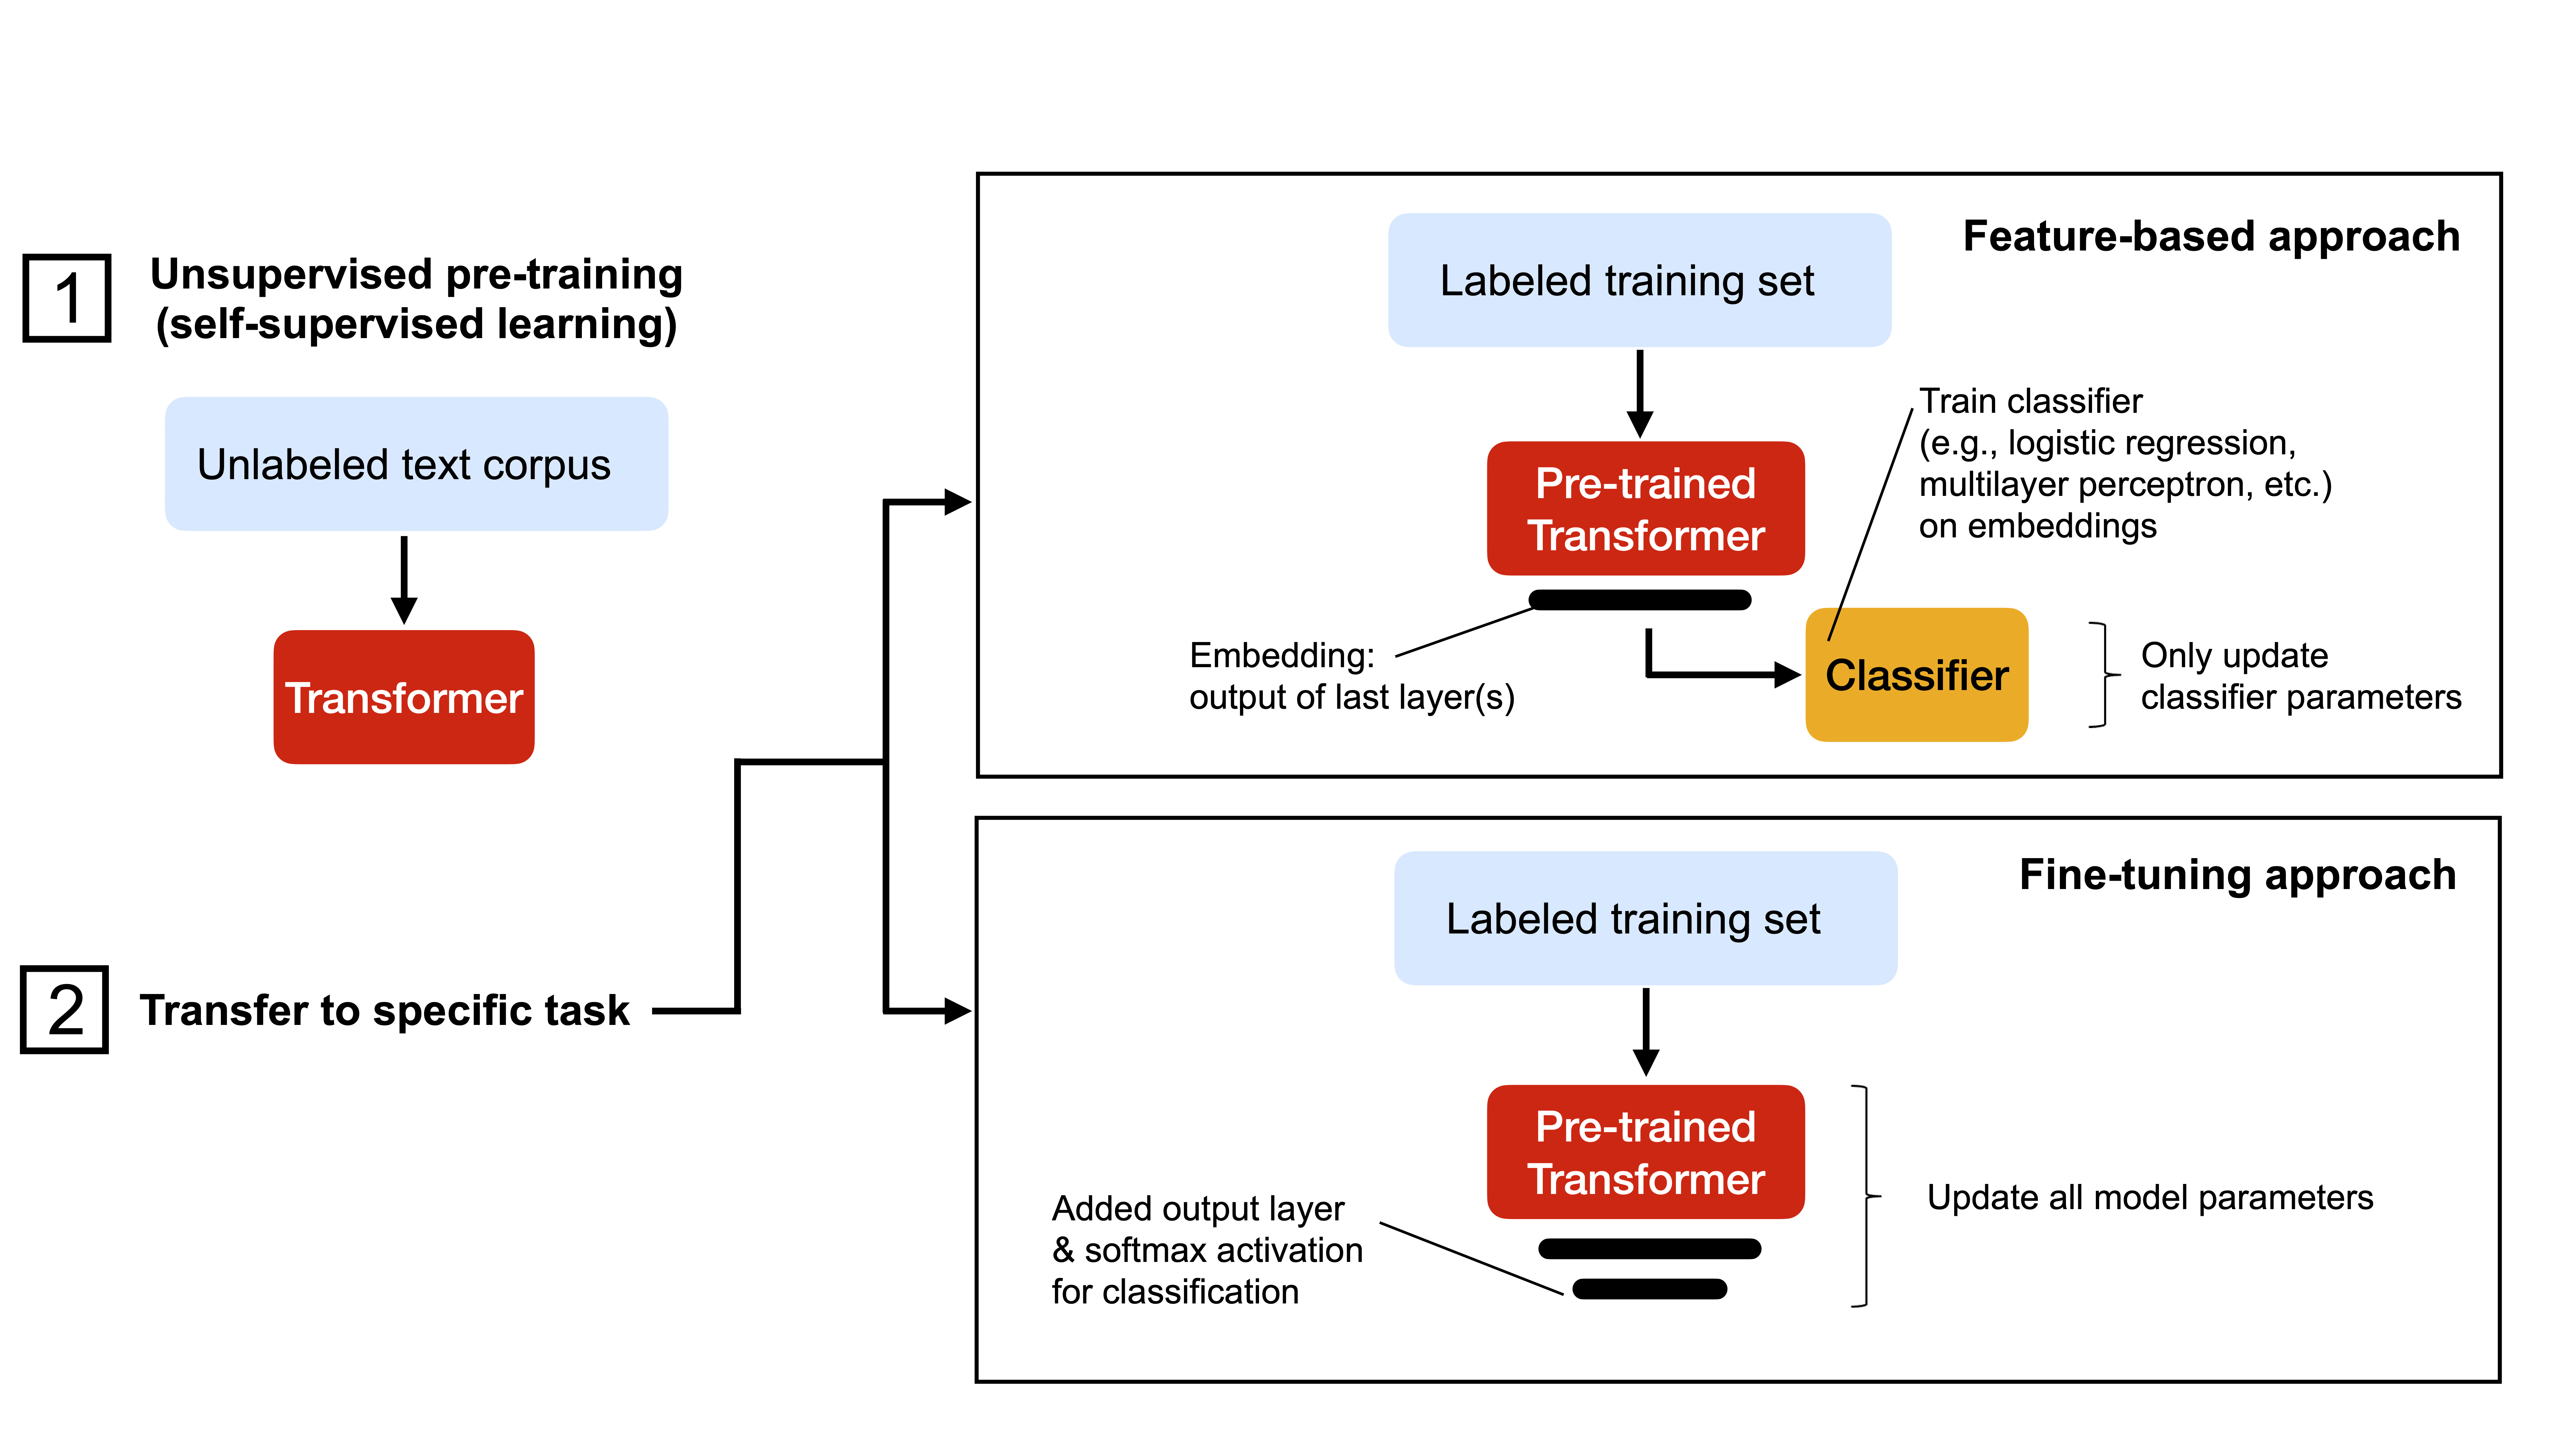

In [2]:
Image(filename='figures/16_10.png', width=800)

## Leveraging unlabeled data with GPT

The Generative Pre-trained Transformer (GPT) is a popular series of large-scale language models
for generating text developed by OpenAI. 

The most recent model, GPT-3, which was released in May 2020 is producing astonishing results. 

We are going to discuss how the GPT model works on a high level.

GPT-1 model was released in 2018. Its training procedure can be decomposed into two stages:
1. Pre-training on a large amount of unlabeled plain text
2. Supervised fine-tuning

GPT-1 is a transformer consisting of (1) a decoder (and without an encoder block) and (2) an additional layer that is added later for the supervised fine-tuning to accomplish specific tasks.

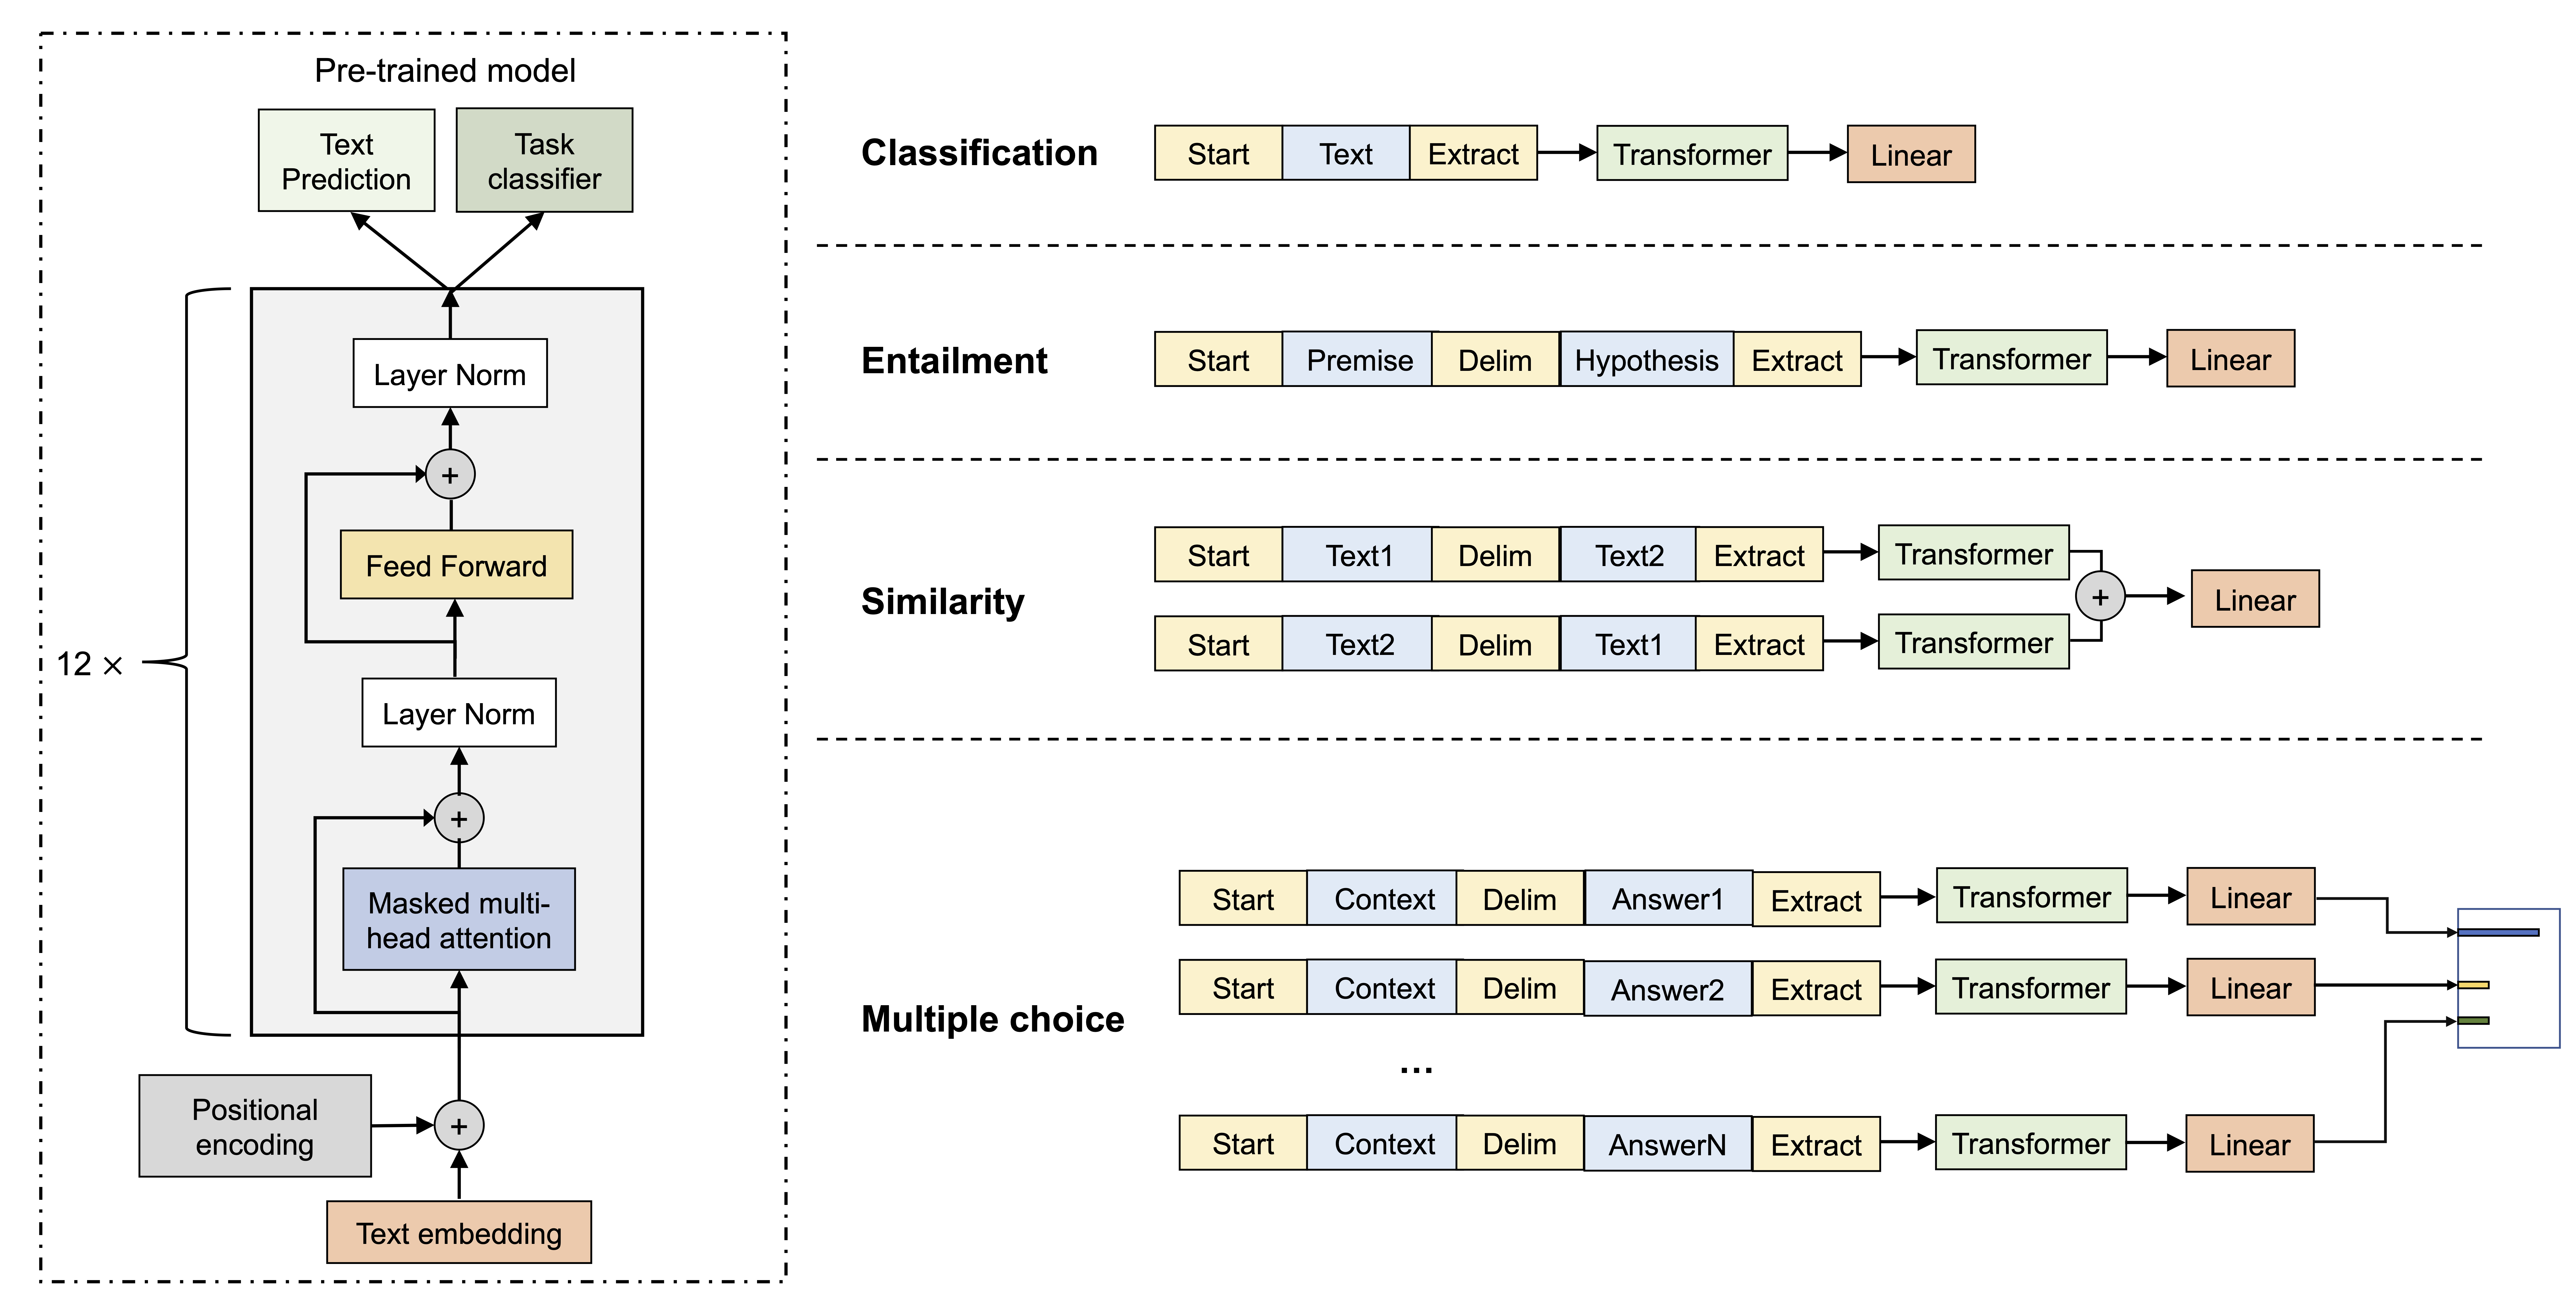

In [3]:
Image(filename='figures/16_11.png', width=800)

If our task is *Text Prediction* (predicting the next word), then the model is ready
after the pre-training step. 

Otherwise, for example, if our task is related to classification or regression,
then supervised fine-tuning is required.

During pre-training, GPT-1 utilizes a transformer decoder structure, where, at a given word position,
the model only relies on preceding words to predict the next word. 

GPT-1 utilizes a unidirectional self-attention mechanism, as opposed to a bidirectional one as in BERT, because GPT-1 is focused on text generation rather than classification.

During the training procedure, for each position, we always feed the correct words from the previous positions to the model. However, during inference (prediction), we just feed the model whatever words it has generated to be able to generate new texts.

After obtaining the pre-trained model (the block in the previous figure labeled as *Transformer*), we
then insert it between the input pre-processing block and a linear layer, where the linear layer serves as an output layer (similar to previous deep neural network models we discussed earlier in this course).

For classification tasks, fine-tuning is as simple as first tokenizing the input and then feeding it into the pre-trained model and the newly added linear layer, which is followed by a softmax activation
function.

For more complicated tasks such as question answering, inputs are organised in a certain format that is not necessarily matching the pre-trained model, which requires an extra processing step customized for each task.

GPT-1 also performs surprisingly well on **zero-shot tasks**, which proves its ability to be a general language model that can be customized for different types of tasks with minimal task-specific fine-tuning.

**Zero-shot learning** generally describes a special circumstance in machine learning where during
testing and inference, the model is required to classify samples from classes that were not observed
during training. In the context of GPT, the zero-shot setting refers to unseen tasks.

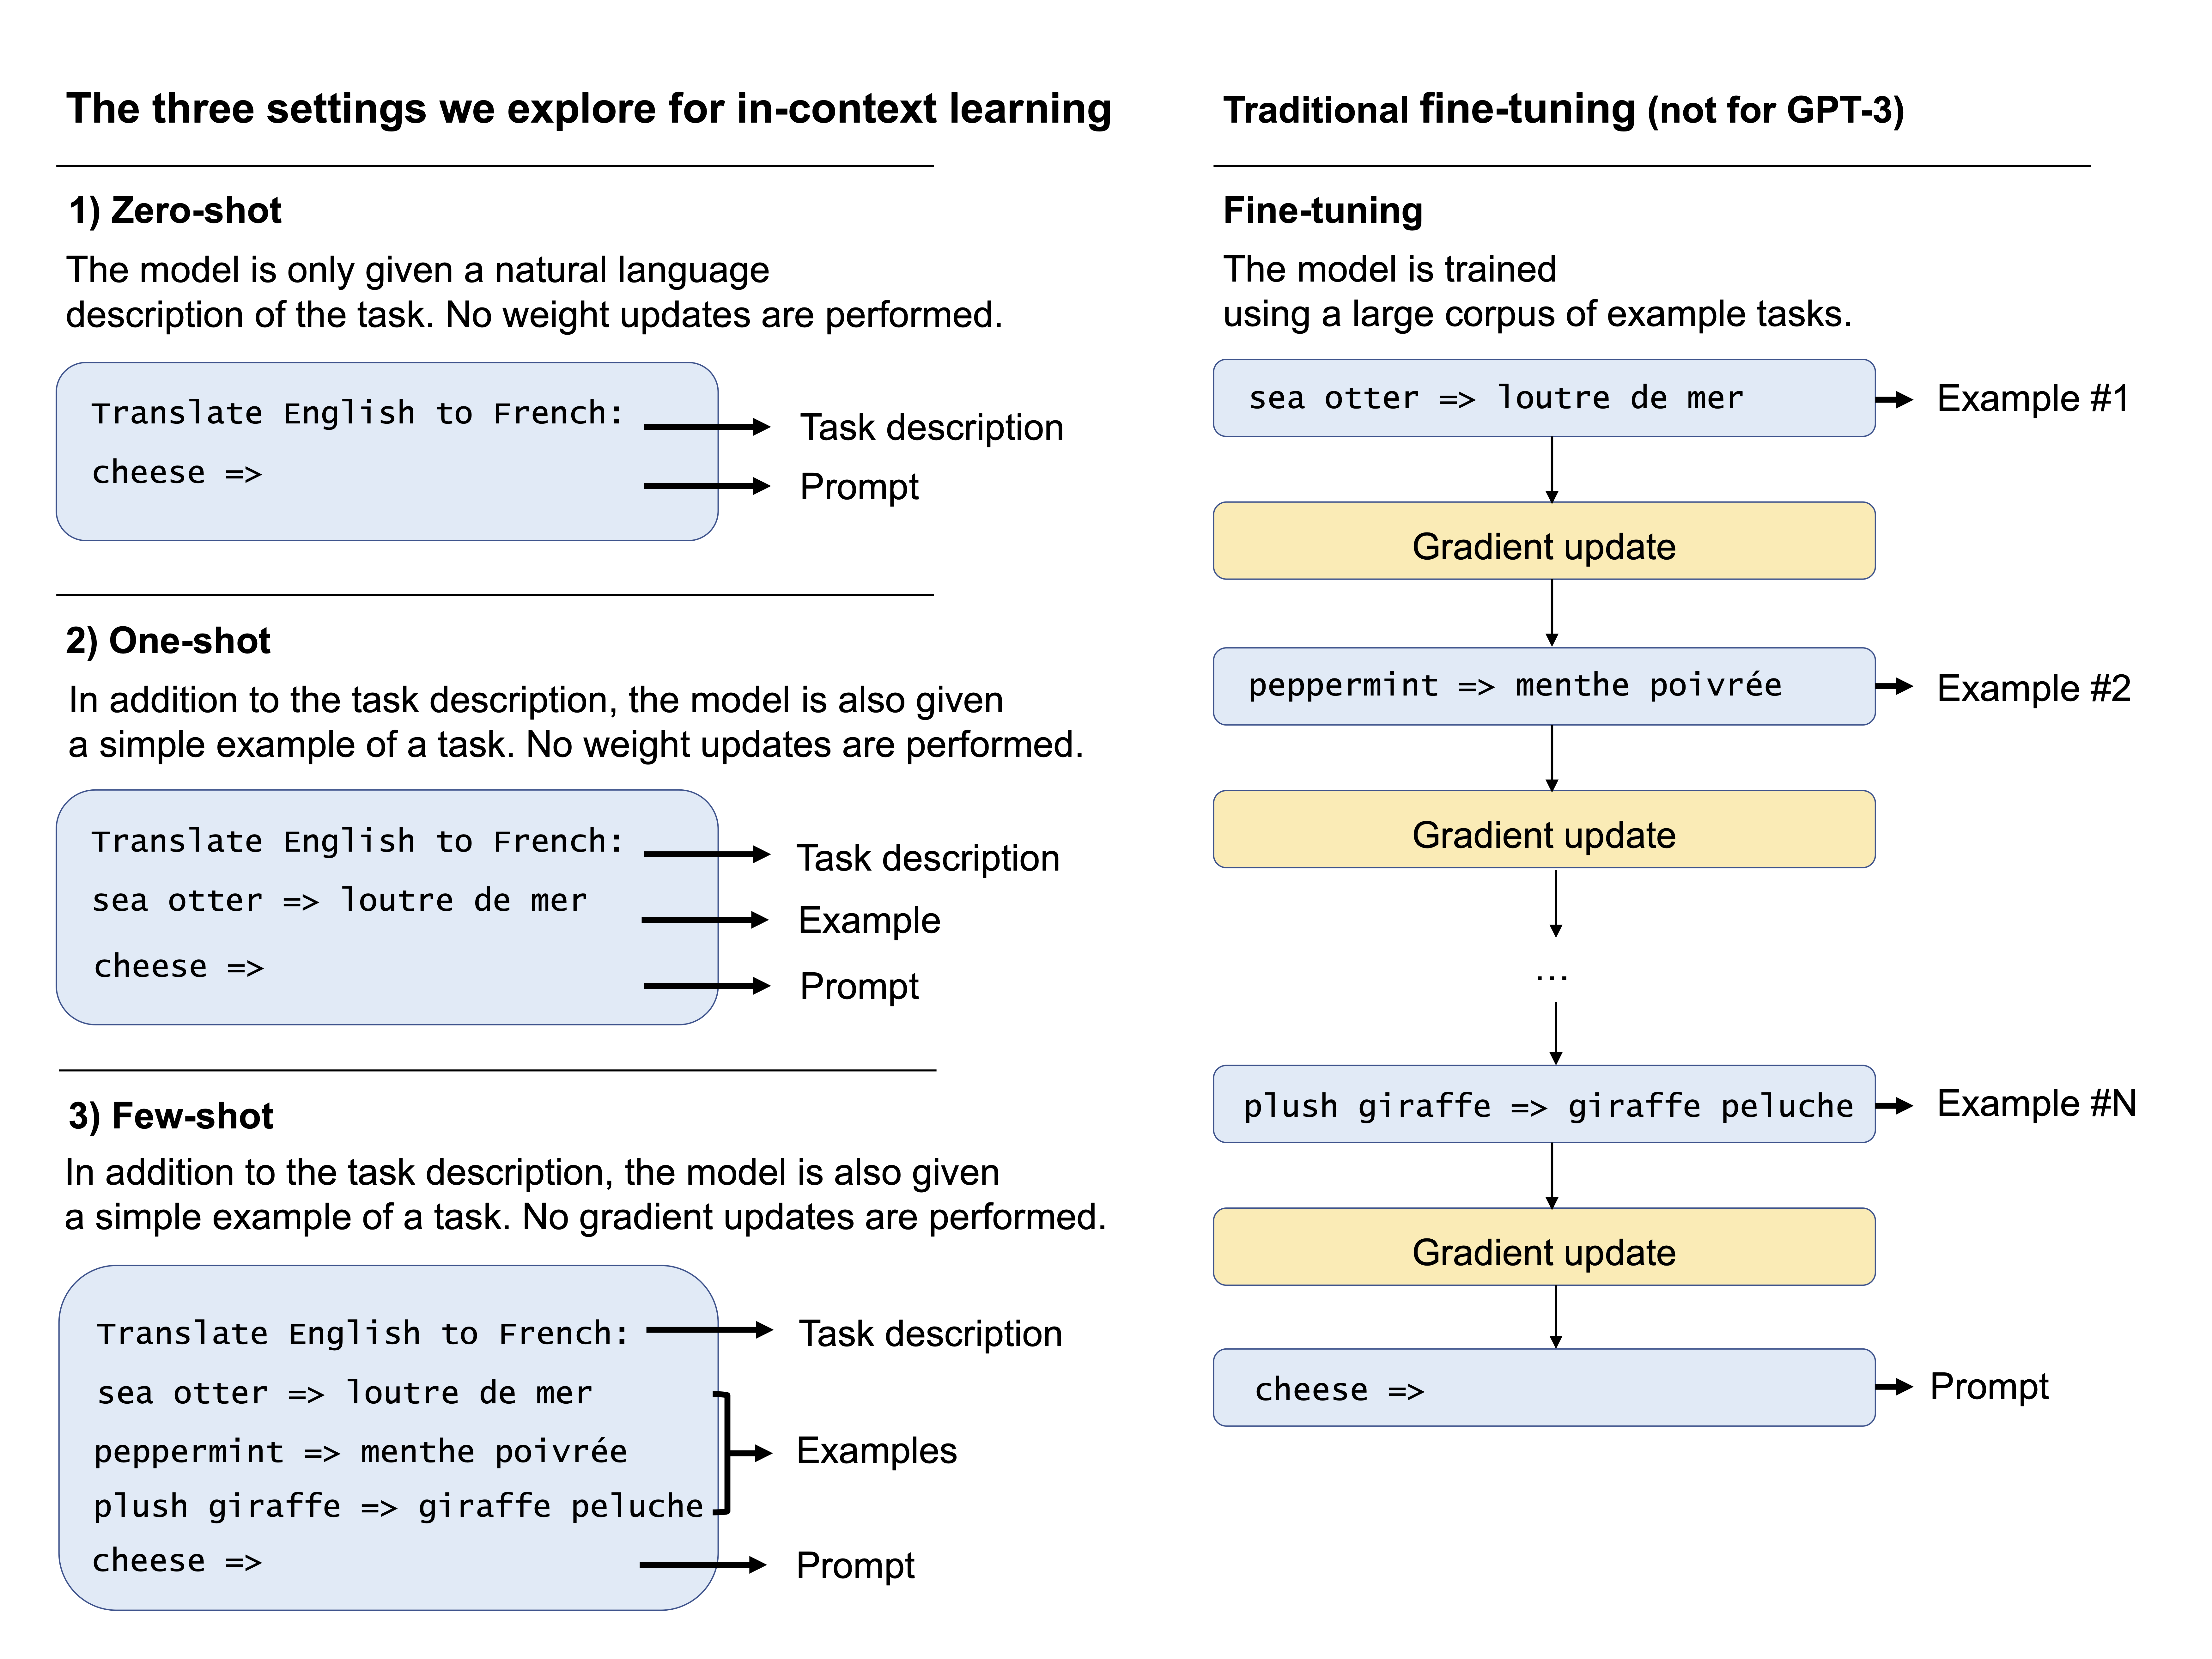

In [4]:
Image(filename='figures/16_12.png', width=800)

The model architecture of GPT-3 is pretty much the same as GPT-2 except for the 100-fold parameter
size increase and the use of a sparse transformer. 

In the original (dense) attention mechanism we discussed in Lecture 6, each element attends to all other elements in the input, which scales with $O(n^2)$ complexity. 

Sparse attention improves the efficiency by only attending to a subset of elements with limited size, normally proportional to $n^{1/p}$. 

### Using GPT-2 to generate new text

An implementation of GPT-2 has been made available by Hugging Face (a popular NLP and machine
learning company; [http://huggingface.co](http://huggingface.co)).

We will access GPT-2 via `transformers`, which is a very comprehensive Python library created
by Hugging Face that provides various transformer-based models for pre-training and fine-tuning.

In [6]:
import transformers

from transformers import pipeline, set_seed


generator = pipeline('text-generation', model='gpt2')
set_seed(123)
generator("Hey readers, today is",
          max_length=20,
          num_return_sequences=3)

config.json: 100%|██████████| 665/665 [00:00<?, ?B/s] 
C:\Users\aa261w\AppData\Local\anaconda3\envs\ECON5130\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aa261w\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
model.safetensors: 100%|██████████| 548M/548M [00:5

[{'generated_text': 'Hey readers, today is the third day in a row where I am starting to get a little fed'},
 {'generated_text': 'Hey readers, today is a very important weekend, and thanks to all of you, will be a'},
 {'generated_text': 'Hey readers, today is the third day of the New Year after I posted a series on the Internet'}]

As we can see from the output, the model generated three reasonable sentences based on our text
snippet. If you want to explore more examples, please feel free to change the random seed and the
maximum sequence length.

We can use a transformer model to generate features for training other models. The following code illustrates how we can use GPT-2 to generate features based on an input text.

In [7]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
text = "Let us encode this sentence"
encoded_input = tokenizer(text, return_tensors='pt')
encoded_input

{'input_ids': tensor([[ 5756,   514, 37773,   428,  6827]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

This code encoded the input sentence text into a tokenized format for the GPT-2 model. As we can
see, it mapped the strings to an integer representation, and it set the attention mask to all 1s, which means that all words will be processed when we pass the encoded input to the model. Here `return_tensors='pt'` means that the tokenizer returns a Python tensor instead of a Python list. 

In [8]:
from transformers import GPT2Model
model = GPT2Model.from_pretrained('gpt2')

The output variable stores the last hidden state, that is, our GPT-2-based feature encoding of the
input sentence:

In [9]:
output = model(**encoded_input)
output['last_hidden_state'].shape

torch.Size([1, 5, 768])

We only showed the shape of the tensor. Its first dimension is the batch size (we only have one input text), which is followed by the sentence length and size of the feature encoding. Here, each of the five words is encoded as a 768-dimensional vector.

Now, we could apply this feature encoding to a given dataset and train a downstream classifier based
on the GPT-2-based feature representation instead of using, for example, a bag-of-words model.

Moreover, an alternative approach to using large pre-trained language models is fine-tuning, as we
discussed earlier. We will be seeing a fine-tuning example later using BERT.

### Bidirectional pre-training with BERT

BERT, its full name being **Bidirectional Encoder Representations from Transformers**, was created
by a Google research team in 2018.

Even though we cannot compare GPT and BERT directly as they are different architectures,
BERT has 345 million parameters (which makes it only slightly larger than GPT-1, and its size
is only 1/5 of GPT-2).

BERT has a transformer-encoder-based model structure that utilises a bidirectional
training procedure. (Or, more accurately, we can think of BERT as using “nondirectional” training
because it reads in all input elements all at once.)

Under this setting, the encoding of a certain word depends on both the preceding and the succeeding words. Recall that in GPT, input elements are read in with a natural left-to-right order, which helps to form a powerful generative language model.

Bidirectional training disables BERT’s ability to generate a sentence word by word but provides input
encodings of higher quality for other tasks, such as classification, since the model can now process
information in both directions.

Recall that in a transformer’s encoder, token encoding is a summation of positional encodings and
token embeddings. In the BERT encoder, there is an additional segment embedding indicating which
segment this token belongs to. This means that each token representation contains three ingredients:

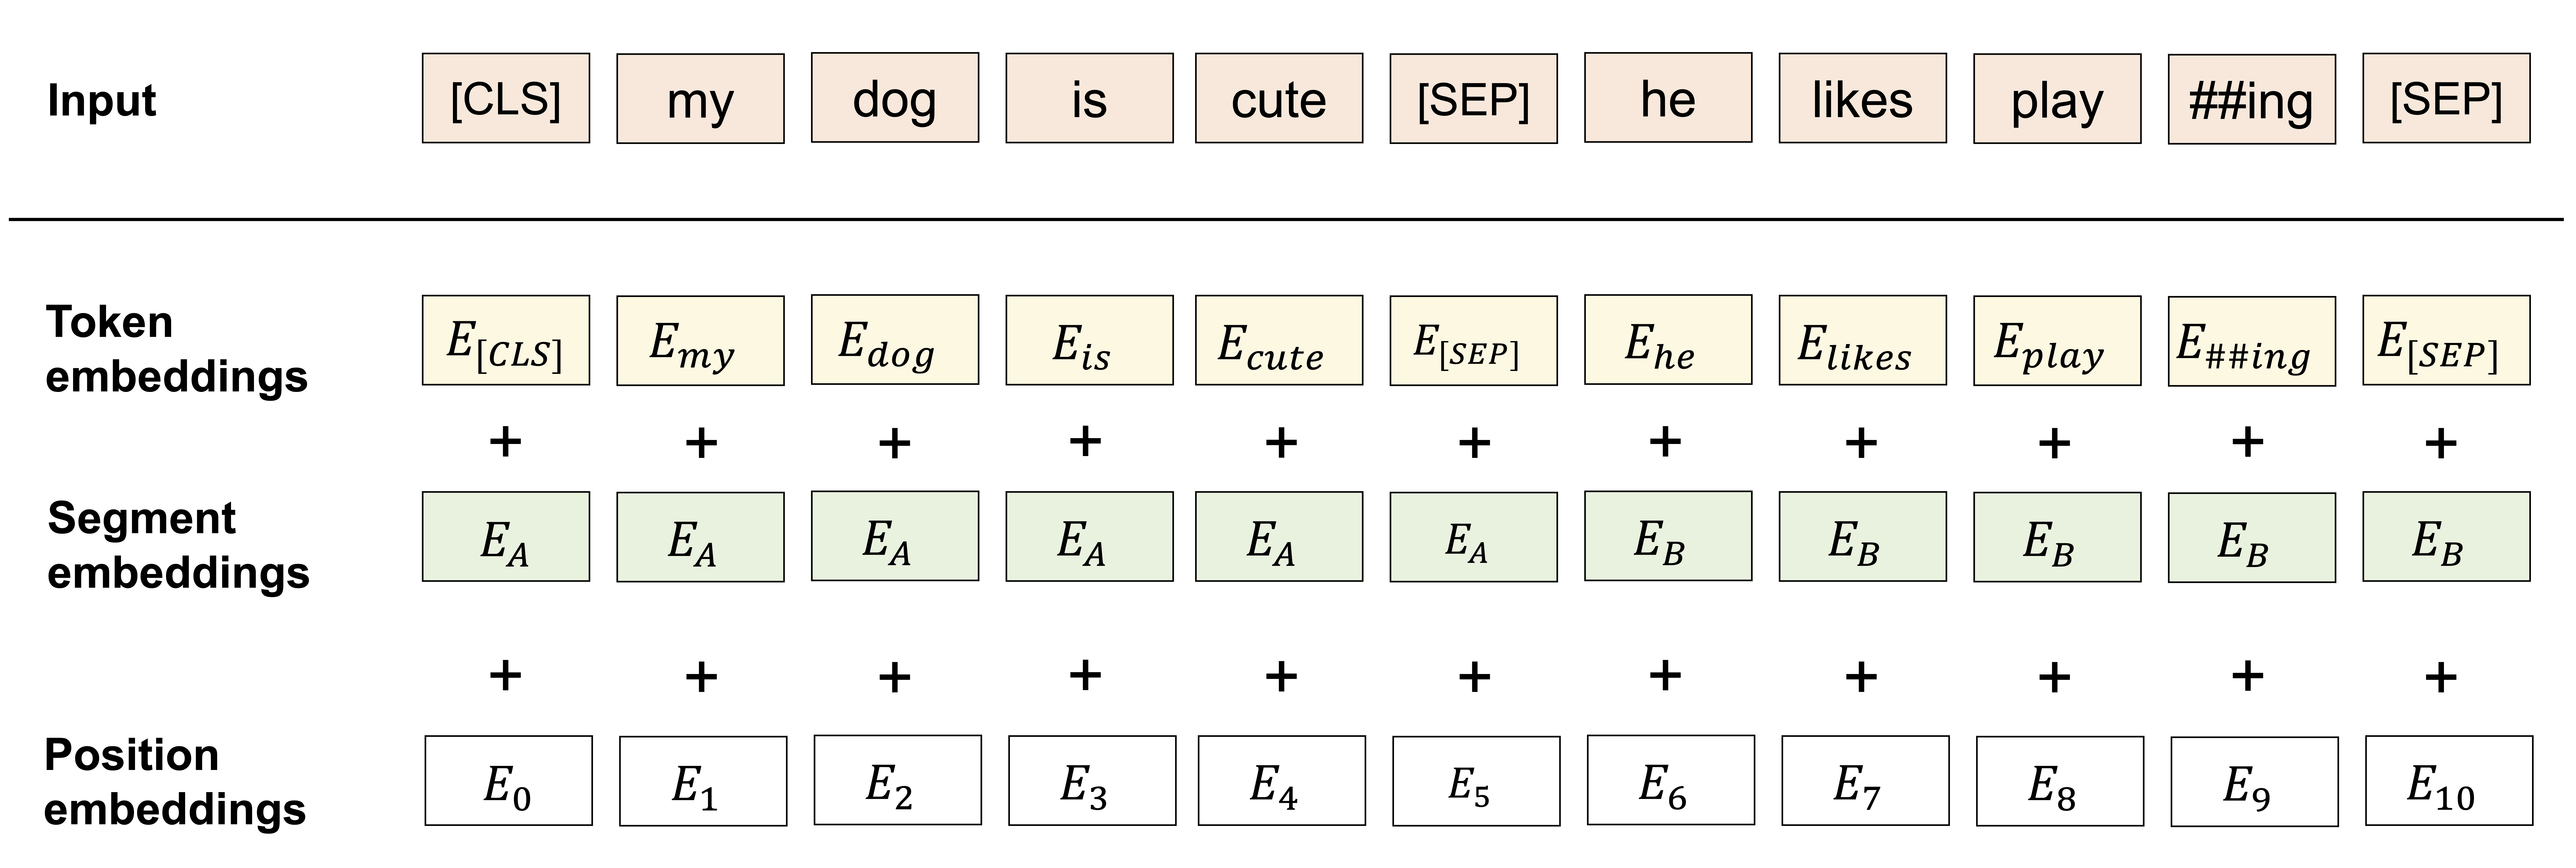

In [3]:
Image(filename='figures/16_13.png', width=700)

The need for this segment information
originated from the special pre-training task of BERT called *next-sentence prediction*. In this pre-training
task, each training example includes two sentences and thus requires special segment notation to
denote whether it belongs to the first or second sentence.

Similar to all other transformer-based
language models, BERT has two training stages: pre-training and fine-tuning. And pre-training includes
two unsupervised tasks: *masked language modeling* and *next-sentence prediction*.

In the **masked language model (MLM)**, tokens are randomly replaced by so-called *mask tokens*, `[MASK]`, and the model is required to predict these hidden words. 

Compared with the next-word prediction in GPT, MLM in BERT is more akin to “filling in the blanks” because the model can attend to all tokens in the sentence (except the masked ones). 

However, simply masking words out can result in inconsistencies between pre-training and fine-tuning since `[MASK]` tokens do not appear in regular texts. 

To alleviate this, there are further modifications to the words that are selected for masking. For instance, 15 percent of the words in BERT are marked for masking. 

These 15 percent of randomly selected words are then further treated as follows:

1. Keep the word unchanged 10 percent of the time
2. Replace the original word token with a random word 10 percent of the time
3. Replace the original word token with a mask token, `[MASK]`, 80 percent of the time

Besides avoiding the aforementioned inconsistency between pre-training and fine-tuning when introducing `[MASK]` tokens into the training procedure, these modifications also have other benefits.

Firstly, unchanged words include the possibility of maintaining the information of the original token;
otherwise, the model can only learn from the context and nothing from the masked words.

Secondly,
the 10 percent random words prevent the model from becoming lazy, for instance, learning nothing
but returning what it is being given.

The probabilities for masking, randomizing, and leaving words
unchanged were chosen by an ablation study; for instance, researchers tested different
settings and found that this combination worked best.

Below is an example where the word *fox* is masked and, with a certain probability, remains
unchanged or is replaced by `[MASK]` or *coffee*. The model is then required to predict what the
masked (highlighted) word is.

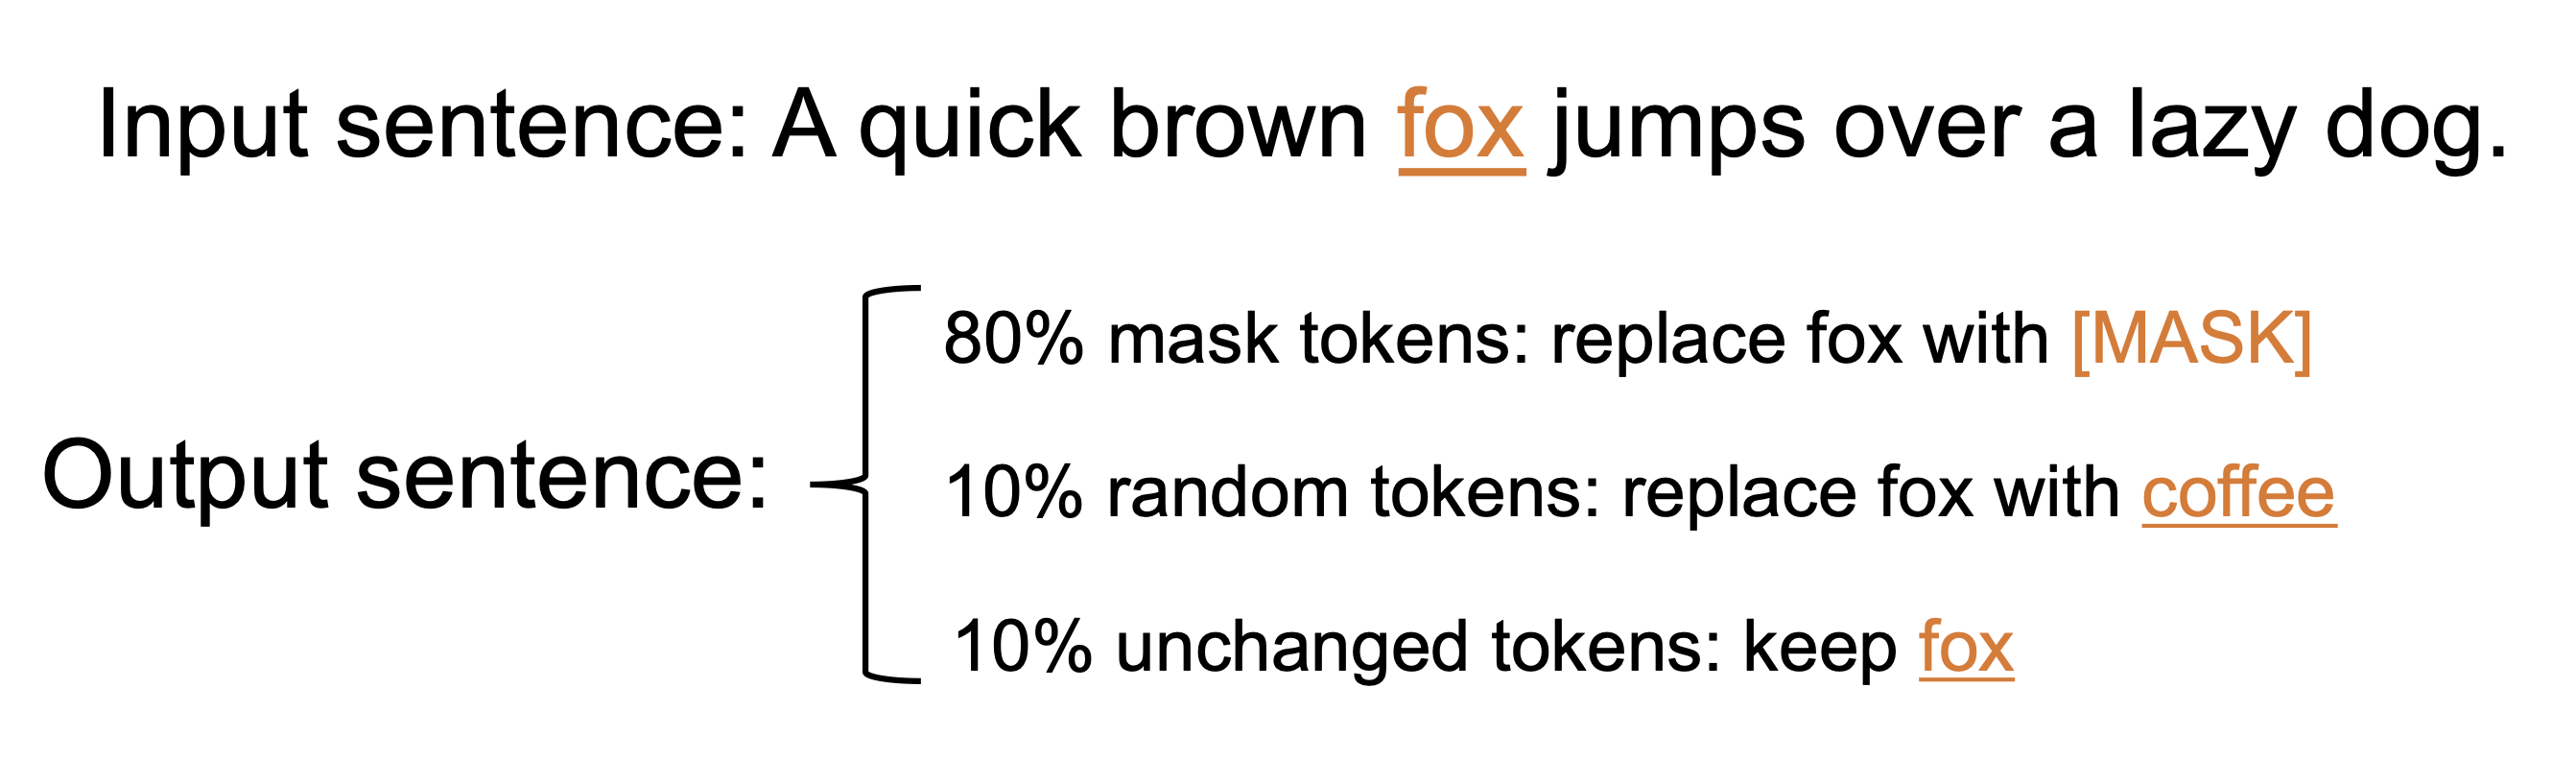

In [4]:
Image(filename='figures/16_14.png', width=600)

Next-sentence prediction is a natural modification of the next-word prediction task considering the
bidirectional encoding of BERT.

In fact, many important NLP tasks, such as question answering, depend on the relationship of two sentences in the document. This kind of relationship is hard to capture via
regular language models because next-word prediction training usually occurs on a single-sentence
level due to input length constraints.

BERT is pre-trained on these two tasks, masked sentences and next-sentence prediction, at the same
time. Here, the training objective of BERT is to minimize the combined loss function of both tasks.

Starting from the pre-trained model, specific modifications are required for different downstream tasks in the fine-tuning stage. 

Each input example needs to match a certain format; for example, it should
begin with a `[CLS]` token and be separated using `[SEP]` tokens if it consists of more than one sentence.

Roughly speaking, BERT can be fine-tuned on four categories of tasks: (a) sentence pair classification; (b) single-sentence classification; (c) question answering; (d) single-sentence tagging.

Among them, (a) and (b) are sequence-level classification tasks, which only require an additional
softmax layer to be added to the output representation of the `[CLS]` token. 

(c) and (d), on the other hand, are token-level classification tasks. This means that the model passes output representations of all related tokens to the softmax layer to predict a class label for each individual token.

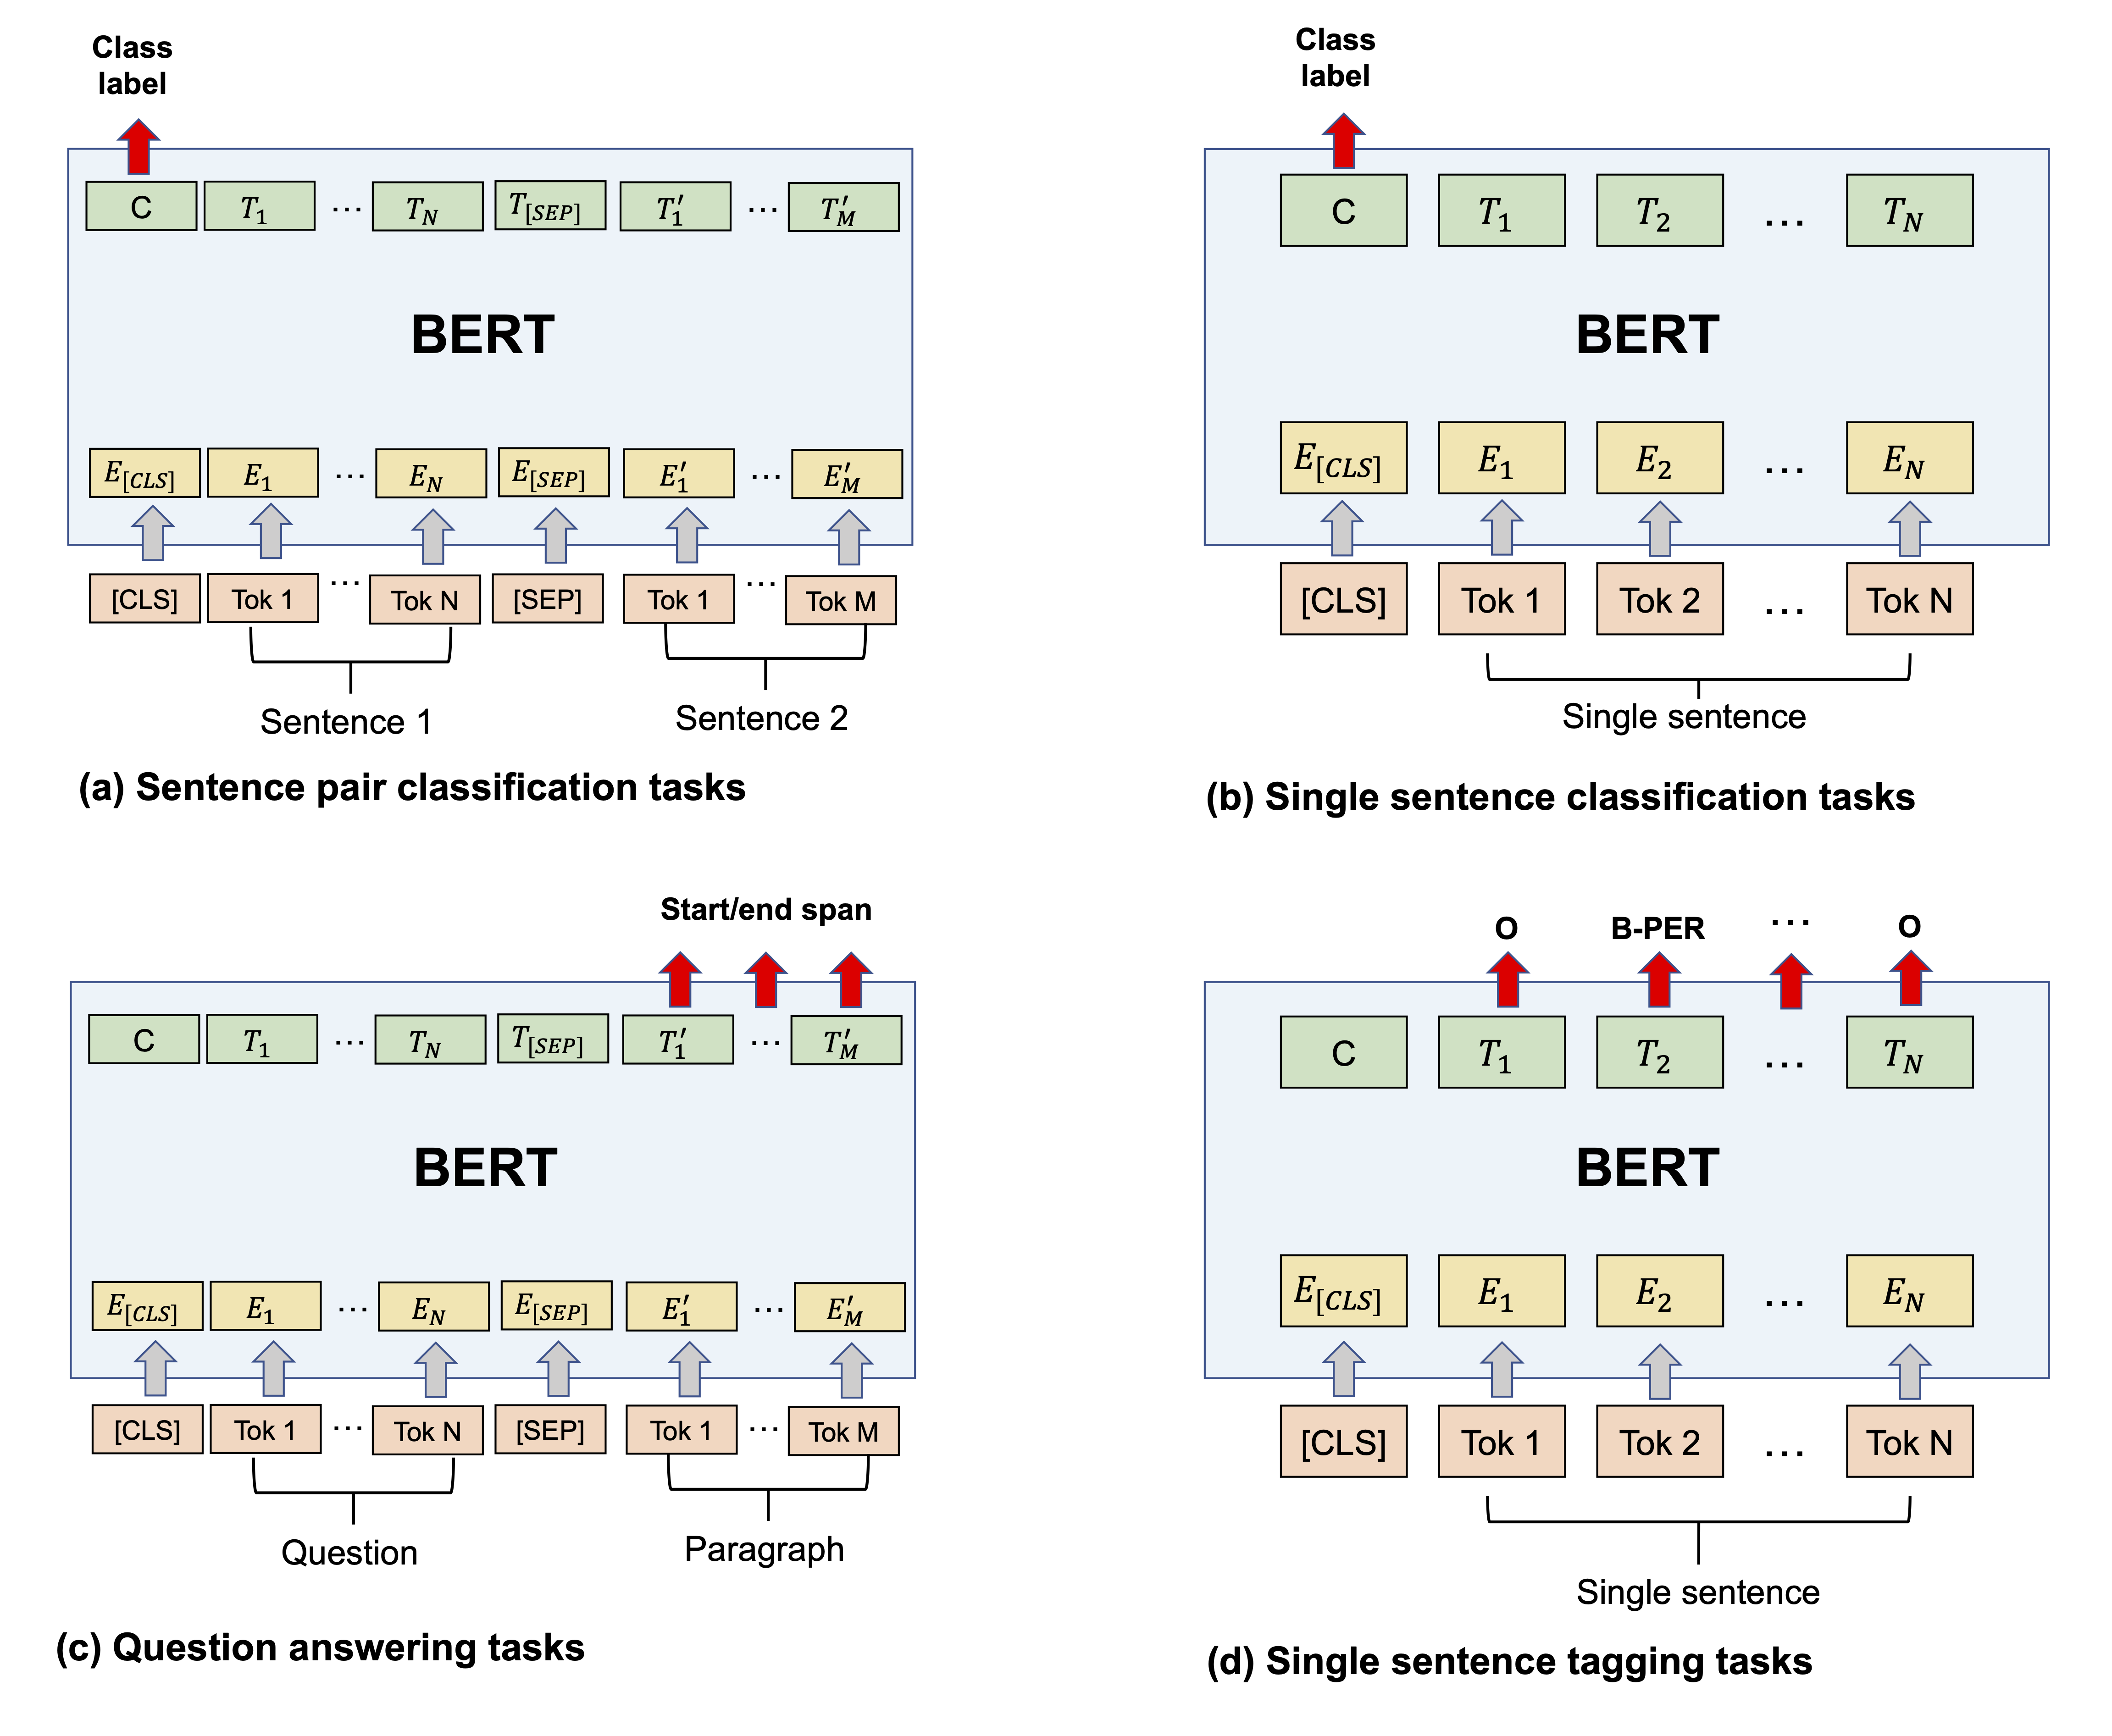

In [5]:
Image(filename='figures/16_15.png', width=800)

As we can see above, the model fine-tuning setup has a very simple structure: an input encoder
is attached to a pre-trained BERT, and a softmax layer is added for classification. Once the model
structure is set up, all the parameters will be adjusted along the learning process.

### The best of both worlds: BART

The Bidirectional and Auto-Regressive Transformer, abbreviated as BART, was developed by researchers
at Facebook AI Research in 2019. GPT’s specialty is generating text, whereas BERT performs better
on classification tasks. BART can be viewed as a generalization of both GPT and BERT.

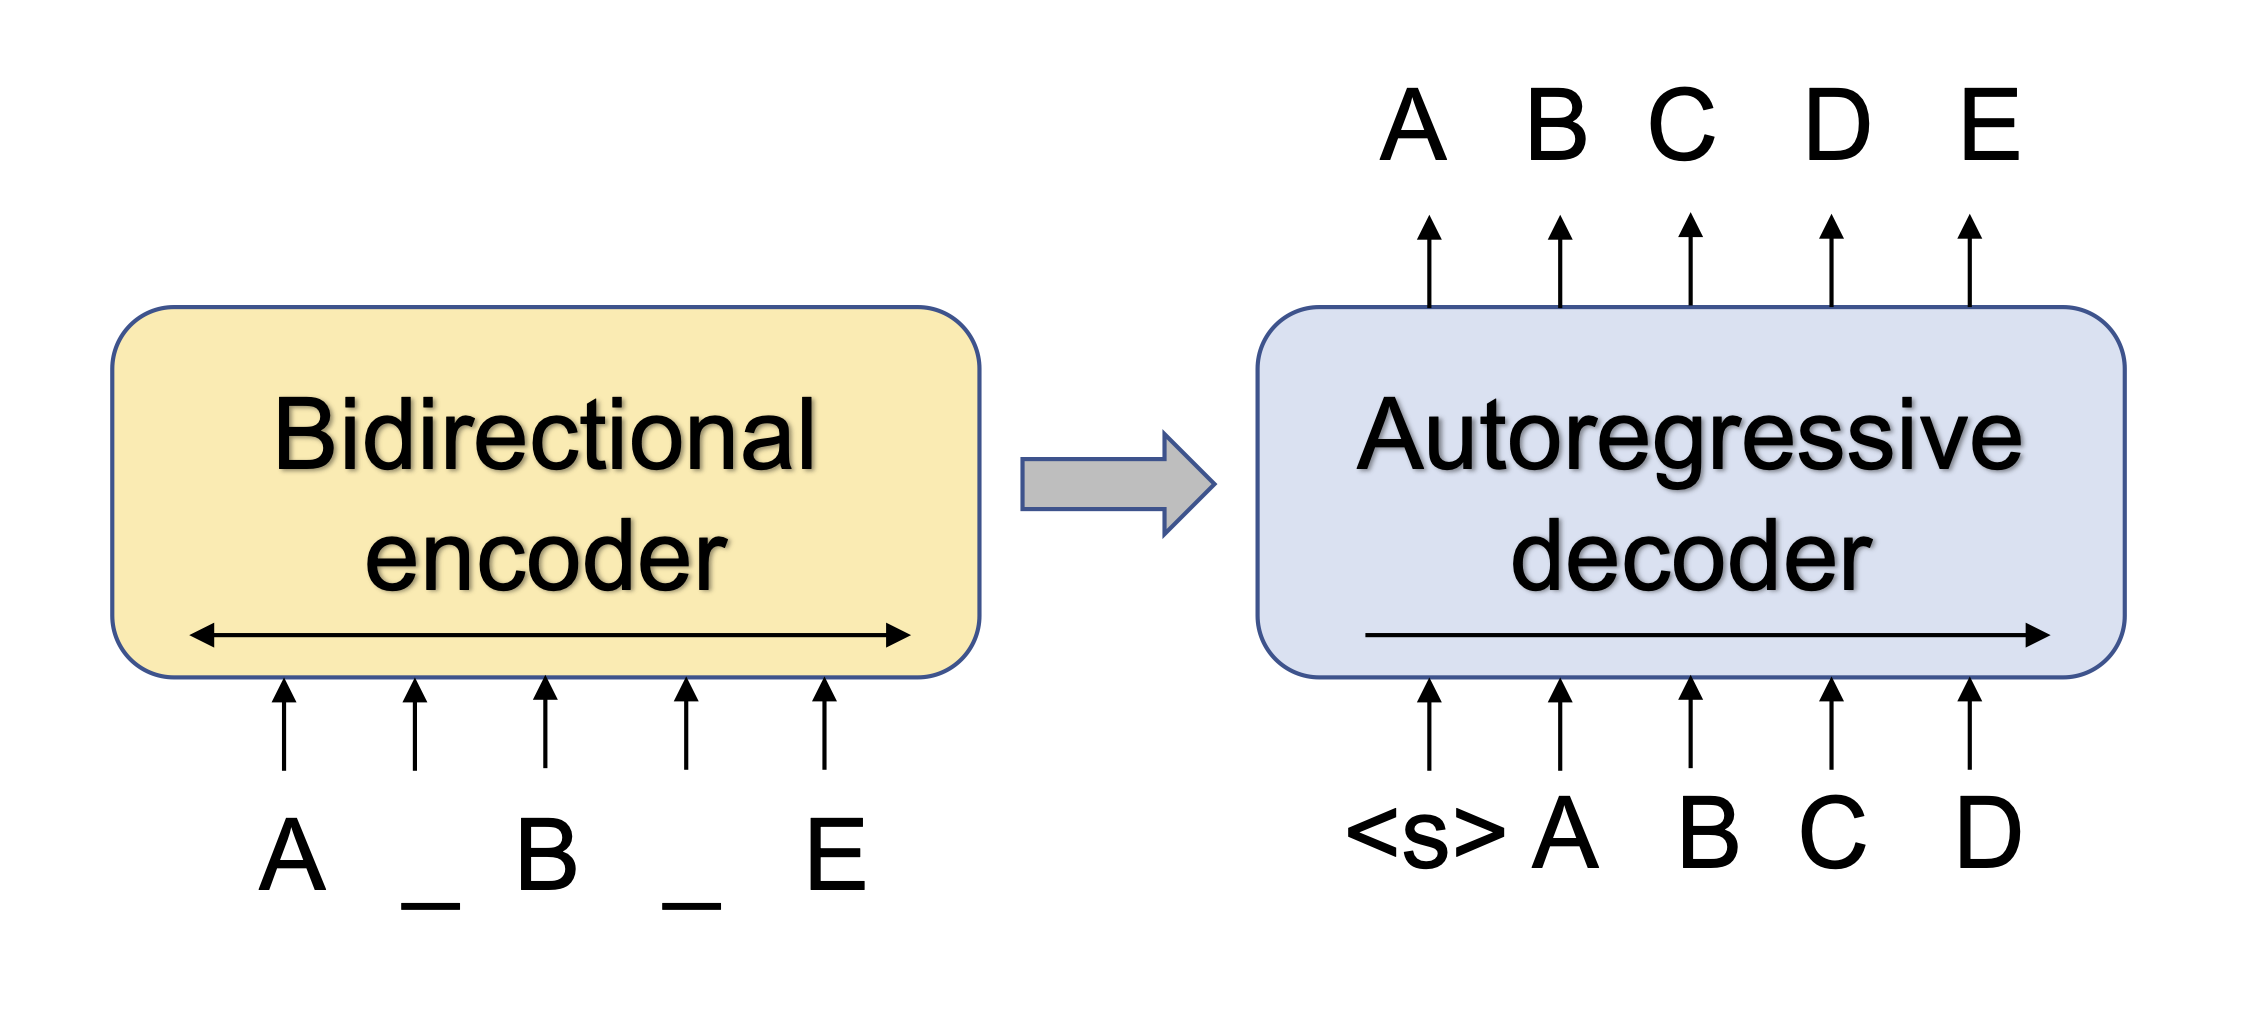

In [6]:
Image(filename='figures/16_16.png', width=500)